## What is ETL?

ETL is actually short form of Extract, Transform and Load, a process in which data is acquired, changed/processes and then finally get loaded into data warehouse/database(s).

You can extract data from data sources like Files, Website or some Database, transform the acquired data and then load the final version into database for business usage.

You may ask, Why ETL?, well, what ETL does, many of you might already been doing one way or other by writing different functions/scripts to perform tasks but one of the main advantage of ETLs is visualizing your entire data flow pipeline thus help you make decisions according to that.

Let's start with building our own ETL pipeline.
* Extract data from CSV file
* Transform/Manipulate Data
* Load Data into MongoDB

In [1]:
# to read data from csv, python provides csv module
import csv

To deal with files in Python, we use the open() function, it’s a built-in Python function. This function accepts two different arguments (inputs) in the parentheses, always in the following order:
* the name of the file (as a string)
* the mode of working with the file (as a string)

The syntax to open a file in python is:

file_obj = open(“filename”, “mode”)  

In [2]:
f = open(r'bonus_program.csv')
# 'f' is a file handler here

csv_reader = csv.reader(f)
print(csv_reader)


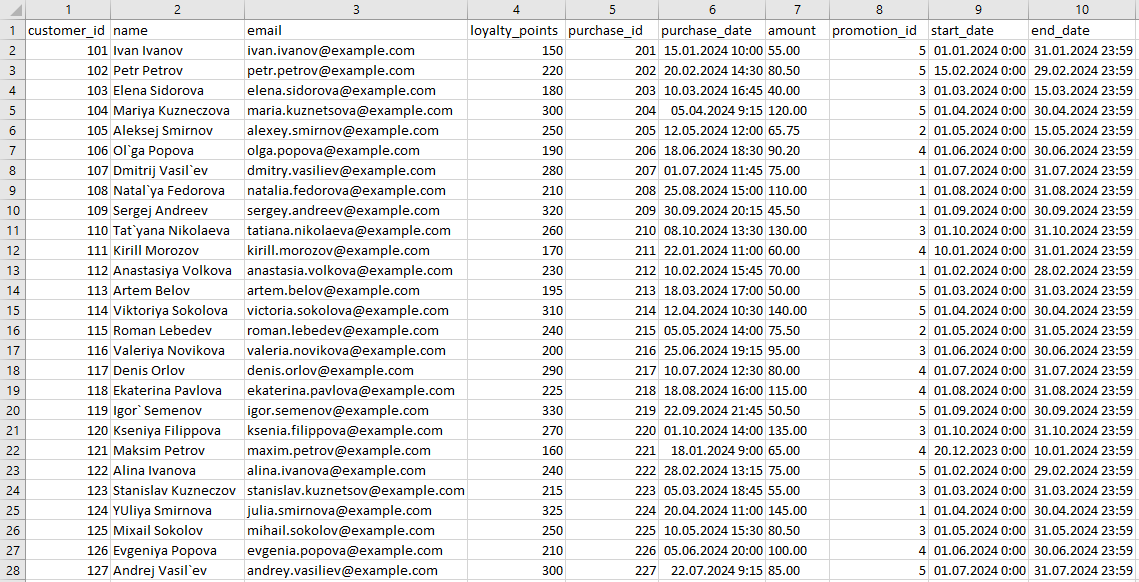

Transforming/Changing the data.

In [3]:
assetsCode = ['1','2','3','4']

# initialize empty list
data = []

next(csv_reader, None)  # skips the headers

# read csv data row wise
for row in csv_reader:
    if(row[7] in assetsCode):
        row[3] = float(row[3]) / 100
        data.append(row)

# print(csv_reader.line_num)
print(len(data))
print(data[0:2])

21
[['103', 'Elena Sidorova', 'elena.sidorova@example.com', 1.8, '203', '3/10/2024 16:45', '40.00', '3', '3/1/2024 0:00', '3/15/2024 23:59'], ['105', 'Aleksej Smirnov', 'alexey.smirnov@example.com', 2.5, '205', '5/12/2024 12:00', '65.75', '2', '5/1/2024 0:00', '5/15/2024 23:59']]


Loading the data into SQL DB

In [4]:
import sqlite3
conn = sqlite3.connect('session.db')

In [5]:
try:
    conn.execute('DROP TABLE IF EXISTS `bonus_program` ')
except Exception as e:
    print(str(e))

In [6]:
# Create a new Table named as Crypto
try:
    conn.execute('''
         CREATE TABLE bonus_program
         (customer_id INTEGER,
         name           TEXT NOT NULL,
         start_date     datetime,
         email          TEXT NOT NULL,
         loyalty_points Float DEFAULT 0,
         promotion_id    INTEGER,
         end_date       datetime,
         purchase_date datetime,
         amount Float DEFAULT 0);''')
    print ("Table created successfully");
except Exception as e:
    print(str(e))
    print('Table Creation Failed!!!!!')
finally:
    conn.close() # this closes the database connection

Table created successfully


In [7]:
print(data[0])

['103', 'Elena Sidorova', 'elena.sidorova@example.com', 1.8, '203', '3/10/2024 16:45', '40.00', '3', '3/1/2024 0:00', '3/15/2024 23:59']


In [8]:
# Some more transformations
sql_data = [(row[1], row[2], row[3], row[5], row[6], row[7], row[8]) for row in data]
sql_data[:2]

[('Elena Sidorova',
  'elena.sidorova@example.com',
  1.8,
  '3/10/2024 16:45',
  '40.00',
  '3',
  '3/1/2024 0:00'),
 ('Aleksej Smirnov',
  'alexey.smirnov@example.com',
  2.5,
  '5/12/2024 12:00',
  '65.75',
  '2',
  '5/1/2024 0:00')]

In [9]:
# lets make new connection to Insert crypto data in SQL DB
conn = sqlite3.connect('session.db')
cur = conn.cursor()
try:
    cur.executemany("INSERT INTO bonus_program(name, email, loyalty_points, purchase_date, amount, promotion_id, start_date) VALUES (?,?,?,?,?,?,?)", sql_data)
    conn.commit()
    print('Data Inserted Successfully')
except Exception as e:
    print(str(e))
    print('Data Insertion Failed')
finally:
    conn.close()

Data Inserted Successfully


In [10]:
# Let's Read data from DB to verify it

conn = sqlite3.connect('session.db')
rows = conn.cursor().execute('Select * from bonus_program')

for row in rows:
    print(row)

(None, 'Elena Sidorova', '3/1/2024 0:00', 'elena.sidorova@example.com', 1.8, 3, None, '3/10/2024 16:45', 40.0)
(None, 'Aleksej Smirnov', '5/1/2024 0:00', 'alexey.smirnov@example.com', 2.5, 2, None, '5/12/2024 12:00', 65.75)
(None, 'Ol`ga Popova', '6/1/2024 0:00', 'olga.popova@example.com', 1.9, 4, None, '6/18/2024 18:30', 90.2)
(None, 'Dmitrij Vasil`ev', '7/1/2024 0:00', 'dmitry.vasiliev@example.com', 2.8, 1, None, '7/1/2024 11:45', 75.0)
(None, 'Natal`ya Fedorova', '8/1/2024 0:00', 'natalia.fedorova@example.com', 2.1, 1, None, '8/25/2024 15:00', 110.0)
(None, 'Sergej Andreev', '9/1/2024 0:00', 'sergey.andreev@example.com', 3.2, 1, None, '9/30/2024 20:15', 45.5)
(None, 'Tat`yana Nikolaeva', '10/1/2024 0:00', 'tatiana.nikolaeva@example.com', 2.6, 3, None, '10/8/2024 13:30', 130.0)
(None, 'Kirill Morozov', '1/10/2024 0:00', 'kirill.morozov@example.com', 1.7, 4, None, '1/22/2024 11:00', 60.0)
(None, 'Anastasiya Volkova', '2/1/2024 0:00', 'anastasia.volkova@example.com', 2.3, 1, None, '2/1

Write data in a csv file

In [12]:
csvfile = open('bonus_program_sql.csv', 'w')
csv_writer = csv.writer(csvfile, lineterminator='\r')
csv_writer.writerow(['name', 'email', 'loyalty_points', 'purchase_date', 'amount', 'promotion_id', 'start_date'])
csv_writer.writerows(sql_data)
csvfile.close()